자동차의 가격을 결정하는 데 무엇이 도움을 줄까?
1. 다른 차량의 가격 및 특성에 대한 데이터가 있는가?
2. 차량의 어떤 기능이 가격에 영향을 주는가?

# 자동차 데이터 set
http://archive.ics.uci.edu/ml/machine-learning-databases/autos/

# 파이썬 데이터 분석 라이브러리
    
    1. Pandas
        - 효과적인 데이터 조작 및 분석
        - 구조화 된 ㅔㄷ이터 제공
        - 열과 행 레이블로 구성된 2차원 테이블 - DataFrame
        
    2. Numpy
        - 입력과 출력을 위해 배열을 사용
        - 배열을 매트릭스에 대한 객체로 확장 가능
        - 빠른 어레이 처리 가능
    
    3. Scipy
        - 일부 고급 수학 문제에 대한 함수 내포
        - 데이터 시각화에 유용

# 파이썬 시각화 라이브러리
    1. Mayplotlib
    2. Seaborn

# 알고리즘 라이브러리
    1. Scikit-learn
        - 통계 모델링, 회귀분석, 분류, 클러스터링 등
        
    2. StatsModels
        - 사용자가 데이터를 탐색하고 통계를 추정 할 수있는 파이썬 모듈
        - 모델을 만들고 통계 테스트 수행

# 파이썬을 이용하여 데이터 읽기 - Pandas
    ex) csv, josn, xlsx, hdf
    - 맨 위의 링크에서 다운받은 import-data 사용

In [2]:
import pandas as pd

# 파일 경로를 변수로 정의
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# read_csv 메서드로 데이터
# 이 데이터에는 열 머리글이 없으므로 read_csv를 지정해야 한다
df = pd.read_csv(url, header = None)

#처음 5개 행 표시
df.head(5)

#마지막 5개 행 표시
df.tail(5)

# 헤더 이름 지정
headers = ["sysmboling", "normalized-losses","make", "fuel-type", "aspiration", "num-of-doors",
          "body-style", "drive-wheels","engine-location","wheel_base","length","width","height",
          "curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore",
          "stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

# 경로에 csv 파일 저장
path = "C:\\MyJupyter\Study Machine Learning\\Analyzing Data with Python\\automoblie.csv"
df.to_csv(path)

# 데이터 타입 반환, 타입을 확인하여 수동으로 해주어야 할 수도 있다.
df.dtypes

# 효과적인 요약 메서드
df.describe()

# 모든 요악을 보기 위해서
# unique = 열에있는 고유 한 개체의 수
# top = 가장 사용된 개체, freq = 열에 맨 위 개체가 나타나는 횟수
# NaN = "숫자가 아님"을 나타낸다 - 통계에 대해 계산할 수 없다는 뜻
df.describe(include = "all")

# DataFrame의 위쪽 30행과 아래쪽 30행을 표시
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
sysmboling           205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

# 데이터에 따른 저장 방법
Data Format | Read |   Save

    csv     | pd.read_csv()   | df.to_csv()
    
    json    | pd.read_json()  | df.to_json()
    
    Excel   | pd.read_excel() | df.to_excel()
    
    sql     | pd.read_sql()   | df.to_sql()

# Data Pre-processing
1. 누락된 값을 확인하고 처리하는 방법
2. Data Formatting - 여러 데이터를 형식화
3. 데이터 정규화 - Data Normalization
    - 모든 데이터를 유사한 범위로 가져오는 방법
            - 센터링, 스케일링 기술
4. Data Binning
    - 일련의 숫자 값에서 더 큰 카테고리를 만듬
    - 데이터 그룹간의 비교에 유용
5. 카테고리 변수, 카테고리를 전화나는 방법
    - 값을 숫자 변수로 변환하여 통계 모델링을 쉽게 만듬

# Dealing with Missing Values

특정 관측치가 누락된 데이터 일때
"?" , "N/A" , 0, 또는 빈 셀로 나타난다

# 어떻게 처리할까 ?

1. 데이터를 수집 한 사람 또는 그룹으로 되돌아가 실제 값을 찾는다

2. 누락된 값이 있는 데이터를 삭제한다.
    - 누락된 데이터가 많은 관찰 결과는 적으니, 일반적으로 엔트리를 삭제한다.
        - 가장 영향력이 적은 데이터를 삭제한다.

3. 데이터를 대체한다
    - 어떤 데이터로 대체할지가 부정확 하기때문에 대체할 데이터를 잘 지정해줘야한다.
    - 하나의 기술로, 평균값으로 대체하는 방법이 있다.
    
    - 평균값을 구할 수 없는 데이터일때 ?
    
4. 누락된 값을 추측할 수 있는 방법을 찾는다.
    - 데이터 수집자가 누락된 정보에 대한 추가 정보를 가지고 있으므로 추측
    
5. 고의적으로 그냥 둔다

# How to drop missing values

In [451]:
import numpy as np

# 삭제하는 함수 ( axis = 0 -> 행삭제, axis = 1 -> 열삭제 )
# inplace = True -> 결과를 다시 데이터 프레임에 적는 것
df.dropna(subset = ["price"], axis = 0, inplace = True)
df.describe()

# 데이터를 대체하는 방법
# dataframe.replace(missing_value, new_value)

,sysmboling,wheel_base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Data Formatting

- 데이터는 대개 다른 장소에서 다른 사람에 의해 다른 형식으로 수집된다.

- Data Formatting 은 데이터를 표준으로 가져오는 것을 의미한다.

예제에서
city-mpg = 갤런 당 마일 단위 자동차의 연료 소비량
- 미터단위로 바꾸어야 한다

In [53]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg" : "city-L/100km"}, inplace = True)
df.describe()

,sysmboling,wheel_base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100km,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000


데이터 유형은 여러가지 이유로 잘못 설정되었을 수도 있다.

In [54]:
df["price"].tail(5)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

- 위의 예제에서 원래는 정수 형태이여야 한다.
- 나중에 분석을 수행할 때 해당 데이터 유형을 탐색하고 이를 변환해야 한다.
- 올바른 데이터타입이 아니라면 나중에 분석시에 모델이 이상하게 나올수도 있다.

Pandas 의 데이터 유형
- Objects
- Int64
- Float64

In [55]:
# 데이터 프레임의 데이터 유형 판별
df.dtypes

sysmboling             int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# 데이터 유형 변경
# NaN 값 등이 있으면 코드가 안먹는다 !
df["price"] = df["price"].replace("?", 0)
df["price"]
df["price"] = df["price"].astype('int')
df.dtypes

sysmboling             int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

# Data Normalization

- data set 값의 범위가 일관되도록 변수를 정규화 한다.
- 이를 통해 일부 통계 분석을 쉽게 수행 할 수 있다.
    변수들 사이의 범위를 일관되게 함으로써 공정한 비교를 가능하게 한다.

# Methods of normalizing data

# 3가지 방법
1. Simple Feature scaling
    - x(new) = x(old) / x(max)
        - 새 값의 범위는 0 ~ 1 사이가 된다.
2. Min-Max
    - x(new) = { x(old) - x(min) } / { x(max) - x(min) }
    
3. Z-score
    - x(new) = { x(old) - 평균 } / 표준편차
        - 결과 값은 0주위, 일반적으로 -3 ~ +3 사이의 범위

In [69]:
# Simple Feature scaling
df["length"] = df["length"] / df["length"].max()
df["length"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
5      0.851994
6      0.925997
7      0.925997
8      0.925997
9      0.856319
10     0.849592
11     0.849592
12     0.849592
13     0.849592
14     0.908217
15     0.908217
16     0.931283
17     0.946660
18     0.678039
19     0.749159
20     0.763095
21     0.755887
22     0.755887
23     0.755887
24     0.755887
25     0.755887
26     0.755887
27     0.755887
28     0.839020
29     0.832292
         ...   
175    0.843825
176    0.843825
177    0.843825
178    0.881788
179    0.881788
180    0.902451
181    0.902451
182    0.825084
183    0.825084
184    0.825084
185    0.825084
186    0.825084
187    0.825084
188    0.825084
189    0.765497
190    0.796252
191    0.865930
192    0.865930
193    0.879865
194    0.907256
195    0.907256
196    0.907256
197    0.907256
198    0.907256
199    0.907256
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 20

In [74]:
# Min-Max
df["length"] = (df["length"] - df["length"].min()) / (df["length"].max()
                                                      - df["length"].min())
df["length"]

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
5      0.540299
6      0.770149
7      0.770149
8      0.770149
9      0.553731
10     0.532836
11     0.532836
12     0.532836
13     0.532836
14     0.714925
15     0.714925
16     0.786567
17     0.834328
18     0.000000
19     0.220896
20     0.264179
21     0.241791
22     0.241791
23     0.241791
24     0.241791
25     0.241791
26     0.241791
27     0.241791
28     0.500000
29     0.479104
         ...   
175    0.514925
176    0.514925
177    0.514925
178    0.632836
179    0.632836
180    0.697015
181    0.697015
182    0.456716
183    0.456716
184    0.456716
185    0.456716
186    0.456716
187    0.456716
188    0.456716
189    0.271642
190    0.367164
191    0.583582
192    0.583582
193    0.626866
194    0.711940
195    0.711940
196    0.711940
197    0.711940
198    0.711940
199    0.711940
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 20

In [76]:
# Z-score
df["length"] = (df["length"]-df["length"].mean())/df["length"].std()
df["length"]

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
5      0.263488
6      1.511737
7      1.511737
8      1.511737
9      0.336438
10     0.222961
11     0.222961
12     0.222961
13     0.222961
14     1.211833
15     1.211833
16     1.600897
17     1.860274
18    -2.670706
19    -1.471091
20    -1.236031
21    -1.357613
22    -1.357613
23    -1.357613
24    -1.357613
25    -1.357613
26    -1.357613
27    -1.357613
28     0.044640
29    -0.068838
         ...   
175    0.125695
176    0.125695
177    0.125695
178    0.766030
179    0.766030
180    1.114567
181    1.114567
182   -0.190420
183   -0.190420
184   -0.190420
185   -0.190420
186   -0.190420
187   -0.190420
188   -0.190420
189   -1.195503
190   -0.676751
191    0.498548
192    0.498548
193    0.733608
194    1.195622
195    1.195622
196    1.195622
197    1.195622
198    1.195622
199    1.195622
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 20

# Binning

 - 값을 묶음으로 그룹화 하는 것
    - ex) "age", "[0 to 5]", "[6 to 10]" etc
 - 예측 모델의 정확성을 향상 시킬수 있다.
 - 데이터 분배를 더 잘 이해할 수 있는 더 작은 수의 저장소

- 위의 예시 중 price 는 5,000 ~ 45,500 사이의 속성 범위이다.
- Binning 을 사용하여 가격을 동일한 4개의 간격 숫자로 나눈다

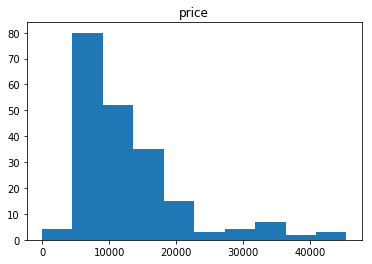

0         Low
1      Medium
2      Medium
3         Low
4      Medium
5      Medium
6      Medium
7      Medium
8      Medium
9         Low
10     Medium
11     Medium
12     Medium
13     Medium
14     Medium
15       High
16       High
17       High
18        Low
19        Low
20        Low
21        Low
22        Low
23        Low
24        Low
25        Low
26        Low
27        Low
28        Low
29        Low
        ...  
175       Low
176       Low
177       Low
178    Medium
179    Medium
180    Medium
181    Medium
182       Low
183       Low
184       Low
185       Low
186       Low
187       Low
188       Low
189       Low
190       Low
191       Low
192       Low
193       Low
194       Low
195       Low
196    Medium
197    Medium
198    Medium
199    Medium
200    Medium
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): [Low < Medium < High]

In [92]:
import matplotlib.pyplot as plt

# 4개 간격으로 Binning
bins = np.linspace(min(df["price"]), max(df["price"]), 4)

# 각 그룹 이름 지정
group_names = ["Low", "Medium", "High"]

# cut 을 이용하여 데이터 값을 분류하고 bins 로 분류한다.
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)

plt.hist(df["price"])
plt.title("price")
plt.show()

df["price-binned"]

# Turning categorical variables into quantitative varivbles
## ( 범주형 변수를 양적 변수로 변환 )

- 대부분의 통계 모델은 객체 또는 문자열을 입력으로 사용할 수 없다.
- 모델 훈련의 경우, 숫자만 입력으로 받아드린다.

- 위의 예시 중 "fuel-type" 기능에는 "gas", "diesel" 의 2가지 문자열 값이 있다.
- 추가 분석을 위에서는 변수를 숫자 형식으로 변환해야 한다.
    - ex ) gas = 1, diesel = 0 의 값을 준다

In [95]:
# 자동으로 변수의 특정 카테고리로 숫자 목록을 생성한다.
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


# Exploratory Data Analysis ( EDA )
    - 데이터 탐색적 분석

1. 데이터의 주요 특성 요약
2. 데이터 집합에 대한 더 나은 이해
3. 서로 다른 변수간의 관계
4. 해결하고자 하는 문제에 대한 중요한 변수 추출

- 배워 나갈 것들
    1. Descriptive Statistics
        - data set의 기능을 분석, 샘플에 대한 간단한 요약
    2. Group by
        - data를 그룹화 하고 집합을 변환하는 방법
    3. ANOVA
        - 분산 분석, 별개의 구성요소로 나뉜 샘플을 분석하는 통계적 방법
    4. Correlation
        - 다른 변수 간의 상관 관계
    5. Correlation - Statistics
        - Pearson Correlation , Correlation Heatmaps

# Descriptive statistics

- 데이터 분석을 할 때는, 시작하기 전에 탐색을 먼저 해야한다
- 복잡한 모델을 구축하기 위해서는 설명적인 통계 분석이 도움이 된다.
- Pandas 의 describe() 함수는 자동으로 기본 통계를 계산한다

In [29]:
drive_wheels_counts = df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

 - Box Plots
        - 데이터의 분포를 시각화 가능
        - 중앙값, Upper Quartile, Lower Quartile 을 보여준다
        - 아웃라이어를 쉽게 발견할 수 있따.
        - 데이터의 분포와 왜도(비대칭도)를 볼 수 있다.
        - 그룹간의 비교가 쉽다

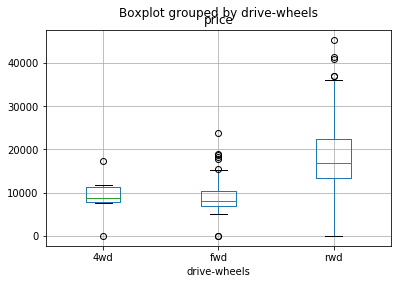

In [47]:
import matplotlib.pyplot as plt

df.boxplot("price", "drive-wheels")

 - Scatter Plot
    - 산포도, 산점도로 두 변수 사이의 관계를 보여줌
    - 위의 예제에서 "engine size" 와 "price" 의 관계
    - 예측 변수 x-axis : "engine size", 타켓 변수 y-axis : "price"

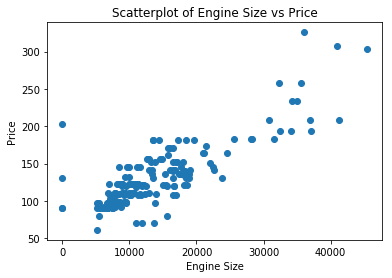

In [45]:
y = df["engine-size"]
x = df["price"]
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.scatter(x,y)

엔진 크기가 올라감에 따라 자동차 가격도 올라간다!
    - 두 사이에 선형 관계에 있음을 알 수 있다.

# Group By

위의 예제에서
    - 다른 "drive system" 에 따른 "price" 를 알고싶다.

 * Pandas
    - dataframe.groupby()

In [321]:
# 차량의 평균 가격을 찾는데 관심이 있다
# 관심이 있는 3개의 데이터 열을 선택
df_test = df[['drive-wheels', 'body-style' , 'price']]
# "drive-wheels" 및 "body-style" 에 따라 축소된 데이터 생성
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


결과는 하위 카테고리로 그룹화되며, 각 하위 카테고리의 평균 가격이 표시된다.

- Pivot Table
    - 피벗 테이블로 보기 쉽게 해보자

In [578]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

열 = "drive-wheels" 에 따라, 행 = "body-style" 에 따라 표시된다

## Heatmap Plot
    - Pivot table을 나타내는 다른 방법

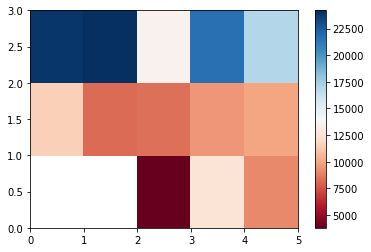

In [61]:
# pyplot 의 pcolor -> 히트맵을 plot, 이전 pivot table을 그래프 형식으로 변환
# 빨강 - 파랑 색 구성표를 지정 'RdBu'
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

- 가로 = "body-style" , 세로 = "drive-wheels"
- 평균 가격은 값에 따라 다양한 색상으로 표시된다.

# Analysis of Variance ( ANOVA = 분산분석)

- 샘플의 평균값으로 모집단의 평균값을 추정하여 각 집단 간의 차이가 통계학적으로 의미가 있는지 살펴보는 절차
- 모집단 평균, 혹은 두 모집단의 차이를 검정 = T-test
- 모집단이 3개 이상인 경우 평균의 차이를 검정 = F-test

- ANOVA ( ANalysis Of VAriance)
    - 분산 분석을 나타내는 통계 테스트
    - 범주형 그룹의 서로 다른 그룹 간의 상관 관계를 찾을 수 있다.
    - 모집단의 평균과의 차이를 확인 할 수 있다.
    - F-test score 과 p-value 를 반환한다

- F-test score
    - 각 샘플 그룹 내에서, 그룹의 평균에 대한 편차의 비율을 계산
    - score 가 낮으면 평균의 차이가 유사, 높으면 평균의 차이가 크다.

- p-value
    - 샘플링한 데이터가 모집단에 비교하였을 때 얼마나 큰 신뢰성을 가지는가 ?
    - 즉, 샘플링한 데이터가 통계 데이터에 유의한가 ?
    
    - 평균값의 차이가 실제로 의미가 있는 차이인지, 분산이 커서 그런건지 ?
    
    - p-value < 0.05
        - 귀무가설을 기각할 수 있다.
    - p-value > 0.05
        - 귀무가설을 기각할 수 없다.
            - 즉, 연관성이 작다.

- http://www.statedu.com/term/7369
    - 용어 설명 사이트

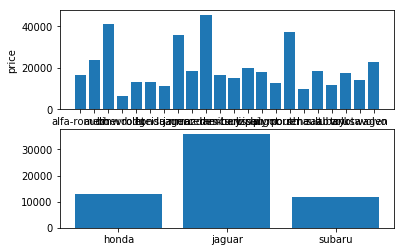

,sysmboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
31,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
32,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
34,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
35,0,110,honda,gas,std,four,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295
36,0,78,honda,gas,std,four,wagon,fwd,front,96.5,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
37,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895
38,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845


In [382]:
import numpy as np

plt.subplot(211)
plt.bar(df["make"], df["price"])
plt.xlabel("name")
plt.ylabel("price")

plt.subplot(212)
df_list = df[df['make'].isin(['honda', 'subaru', 'jaguar'])]
plt.bar(df_list["make"], df_list["price"])

plt.show()
df_list

In [385]:
import scipy.stats

# make 와 price 데이터 추출
df_anova = df[["make", "price"]]
# 제작자별로 데이터를 그룹화
grouped_anova = df_anova.groupby(["make"])
# f_oneway()
# honda vs subaru
anova_results_1 = scipy.stats.f_oneway(grouped_anova.get_group("honda")["price"],
                                grouped_anova.get_group("subaru")["price"])
# honda vs jaguar
anova_results_2 = scipy.stats.f_oneway(grouped_anova.get_group("honda")["price"],
                                      grouped_anova.get_group("jaguar")["price"])

print(anova_results_1)
print(anova_results_2)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


- honda vs subaru 의 가격
    - F 테스트 점수가 1보다 작다.
        - 평균값이 거의 비슷하다.
    - pvalue > 0.05
        - 둘 사이의 연관성이 없다.
- honda vs jaguar 의 가격
    - F 테스트 점수가 아주 크다
        - 평균이 격차가 크다
    - pvalue > 0.05
        - 둘 사이의 연관성이 없다.

# Correaltion

- 서로 다른 변수 간의 상관 관계
    - 어느 정도 상호 의존적인지를 측정하는 통계 척도
- 상관 관계가 원인을 의미 하지는 않는다!
    - ex) 우산과 비는 상관 관계가 있지만, 우산이 비를 내렸는지 우산이 비를 일으켰는지에 대한 정보가 없다

위의 예제에서 "engine-size" 와 "prices" 의 상관관계를 본다.

(0, 55811.08297296615)

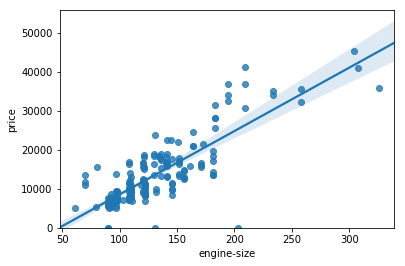

In [389]:
import seaborn as sns
sns.regplot(x = "engine-size", y = "price", data=df)
plt.ylim(0,)

- linear line = "regression line" (= 회귀선) 이라고 불린다.
- plot 의 목표는  "engine-size" 가 "price" 에 미치는 영향을 확인하는 것이다.
- 이 예시에는 data point를 통과하는 직선이 매우 가파르다
    - 두 변수간에 양의 선형관계가 있음을 보여준다.
- 기울기가 가파르다 == 상관 관계가 큰 예시

# Correlation - Statistics

1. Pearson Correlation
    - 연속적인 수치 변수간의 상관 관계 정도를 특정하는 방법
    - Correaltion coefficient(= 상관 계수), p-value 를 사용
        - Correaltion coeffieient
            - Colse to +1 : Large Positive relationship
            - Colse to -1 : Large Negative relationship
            - Colse to  0 : No relationship
        - P-value
            - p < 0.001 : 상관 관계가 확실하다
            - p < 0.05 : 중간 정도의 확실성
            - p < 0.1 : 약한 확실성
            - p > 0.1 : 확실성 x
    - 상관 계수가 가까울수록 강한 상관관계에 있다.
        - 1 or -1, p-value < 0.001 미만
        

위의 예제에서 "horse-power", "price"

In [585]:
import scipy.stats as stats

df[df['horsepower'].isin(['?'])] = df[df['horsepower'].isin(['?'])].replace('?', 0, inplace = True)
df[df['price'].isin(['?'])] = df[df['price'].isin(['?'])].replace('?', 0 , inplace = True)
df.dropna(subset = ["horsepower"], axis = 0 , inplace = True)
stats.pearsonr(df['horsepower'].astype('float'), df['price'].astype('float'))


(0.792757895134827, 1.1655292578894657e-44)

- Pearson Correlation ~= 0.8
    - 1에 가까우므로 강한 양의 상관 관계가 있다
- P-valude = 1.16e-44
    - 0.001 보다 훨씬 작은 값
        - 상관 관계가 확실하다

# Model Development

- 배우게 될 것
    - Simple and Multiple Linear Regression
        - 단순 및 다중 선형 회귀 분석
    - Model Evaluation using Visualization
        - 시각화를 이용한 모델 평가
    - Polynomial Regression and Pipelines
        - 다항 회귀와 파이프 라인
    - R-squared and MSE for In-Sample Evaluation
        - 샘플 내 평가를 위한 R 제곱 및 MSE
    - Prediction and Decision Making
        - 예측 및 의사 결정

# Linear Regression and Multiple Linear Regression

- 차이점
    - 참조하는 독립 변수의 갯수

# Simple Linear Regression ( SLR )

- Y^ = b0 + b1X

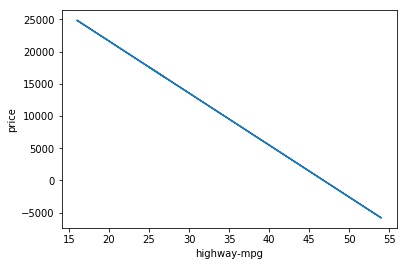

In [21]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# 선형 회귀 모델 생성
lm = LinearRegression()

# 예측 변수
df[df['highway-mpg'].isin(['?'])] = df[df['highway-mpg'].isin(['?'])].replace('?', 0)
X = df[['highway-mpg']]
# 타겟
df[df['price'].isin(['?'])] = df[df['price'].isin(['?'])].replace('?', 0)
Y = df['price']

# 모델 교육
lm.fit(X ,Y)
Yhat = lm.predict(X)

plt.plot(X, Yhat)
plt.xlabel("highway-mpg")
plt.ylabel("price")
plt.show()

In [11]:
# 절편 (b0)
lm.intercept_

37758.5056296937

In [12]:
# 기울기 (b1)
lm.coef_

array([-806.76723574])

둘 사이의 식은 다음과 같이 정의된다
- Price = 37758.51 - 806.77 * highway-mpg

# Multiple Linear Regression ( MLR )

 
- Y^ = b0 + b1X1 + b2X2 + b3X3 + ....

In [6]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 생성
lm = LinearRegression()

df[df['horsepower'].isin(['?'])] = df[df['horsepower'].isin(['?'])].replace('?', 0)
df[df['curb-weight'].isin(['?'])] = df[df['curb-weight'].isin(['?'])].replace('?', 0)
df[df['engine-size'].isin(['?'])] = df[df['engine-size'].isin(['?'])].replace('?', 0)
df[df['highway-mpg'].isin(['?'])] = df[df['highway-mpg'].isin(['?'])].replace('?', 0)
df[df['price'].isin(['?'])] = df[df['price'].isin(['?'])].replace('?', 0)

# 4가지 변수
z = df[['horsepower', 'curb-weight' , 'engine-size', 'highway-mpg']]

# 모델 교육
lm.fit(z, df['price'])

Yhat = lm.predict(z)
Yhat

array([13896.49032606, 13896.49032606, 17227.23244169, 10375.21137424,
       16290.42510874, 14803.20232557, 15851.4869507 , 16193.65700638,
       16774.35165898, 16232.01250439, 10621.32269212, 10621.32269212,
       18036.9536937 , 18208.03872154, 19633.90021086, 25530.04045633,
       25996.6359868 , 26734.65012691, -1481.28889727,  4655.05455499,
        4763.92684543,  5019.51072075,  5543.28751782,  8477.43453608,
        5826.35547297,  5894.78948411,  5894.78948411,  8673.40465888,
       12528.96986454, 18033.50821987,  2514.87539344,  5556.62590679,
        3512.15132738,  6631.38203079,  6681.15222071,  6849.12661168,
        6892.67552786,  9723.08620511,  9887.94995921,  9934.60951226,
       10146.1328194 , 11240.50567186, 10186.22451351, 10885.2541009 ,
        4655.05455499,  4763.92684543, 12973.25930694, 34239.19102087,
       34239.19102087, 41551.14469471,  6922.40536039,  5731.36586927,
        5746.91905362,  5871.34452841,  5886.89771276,  7312.14020322,
      

In [33]:
# 절편 (b0)
lm.intercept_

-3558.1248837675957

In [32]:
# 기울기 (b1 ~ b4)
lm.coef_

array([  -4.52518033,    3.11063687,  113.42306658, -174.59226569])

# Model Evaluation using Viualization

## 1. Regression Plot

(0, 48281.09207486772)

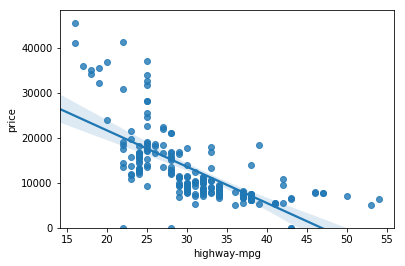

In [60]:
import seaborn as sns


df[df['price'].isin(['?'])] = df[df['price'].isin(['?'])].replace('?', 0)
df["price"] = df["price"].astype('int64')

sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0, )

- 가로축 x = 독립 변수 , 세로축 y = 종속 변수
- 각 점은 다른 목표 지점
- 꺾은 선 = 예측된 값

## 2. Residual Plot

- 예측된 값과 실제 값의 차이를 표시
- 결과가 0 가 되면 ( = mean ) 완벽

- 플롯이 곡률이 있다
    - = 선형 가정이 부정확 하다
- 분산이 x와 함께 증가한다
    - = 모델이 정확하지 않다

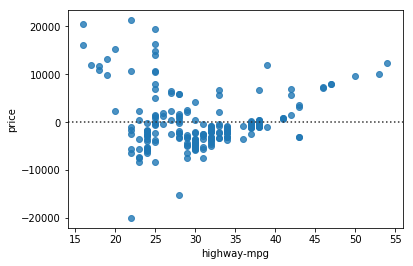

In [8]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 생성
lm = LinearRegression()

df[df['price'].isin(['?'])] = df[df['price'].isin(['?'])].replace('?', 0)
df["price"] = df["price"].astype('int64')

sns.residplot(df["highway-mpg"], df["price"])

- 첫번째 매개변수 = 종속 변수 or 기능, 두번째 매개변수 = 예측 대상 변수
- 위의 결과는 곡률이 있다

## 3. Distribution Plots

- 두 개 이상의 독립 변수가 있는 모델을 시각화하는데 유용
- 실제 값과 예측된 값의 차이를 볼 수 있음
- x 축의 Points 를 여러가지로 지정하고, 각 포인트마다 예측하여 히스토그램으로
    - 그 후에 그래프로 표현

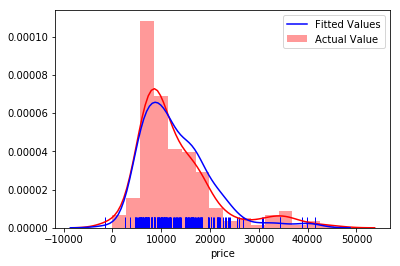

In [32]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 생성
lm = LinearRegression()

df[df['horsepower'].isin(['?'])] = df[df['horsepower'].isin(['?'])].replace('?', 0)
df[df['curb-weight'].isin(['?'])] = df[df['curb-weight'].isin(['?'])].replace('?', 0)
df[df['engine-size'].isin(['?'])] = df[df['engine-size'].isin(['?'])].replace('?', 0)
df[df['highway-mpg'].isin(['?'])] = df[df['highway-mpg'].isin(['?'])].replace('?', 0)

# 4가지 변수
z = df[['horsepower', 'curb-weight' , 'engine-size', 'highway-mpg']]
# 모델 교육
lm.fit(z, df['price'])
Yhat = lm.predict(z)


axl = sns.distplot(df['price'], hist=True, color ="r", label = "Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=axl, rug = True)

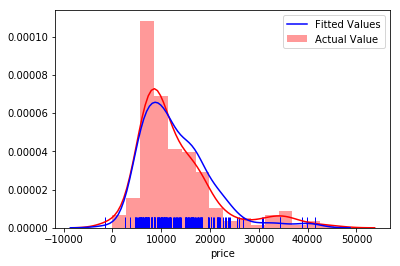

In [34]:
axl = sns.distplot(df['price'], hist=True, color ="r", label = "Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=axl,kde = True, rug = True)

- 모델에서 나온 적합한 값 = 파란색
- 실제 값 = 빨간색

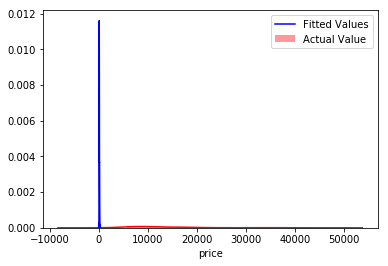

In [20]:
x = df[["horsepower"]]
lm.fit(x, df["price"])
Yhat = lm.predict(x)

axl = sns.distplot(df['price'], hist=True, color ="r", label = "Actual Value")
sns.distplot(x, hist=False, color="b", label="Fitted Values", ax=axl)